In [15]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np
iris = datasets.load_iris()

# Ziel: vorhersagen der sepal_width basierend auf der sepal_length

sepal_length = iris["data"][:, 2]
sepal_width = iris["data"][:, 3]

X = sepal_length[:, np.newaxis]
y = sepal_width

model = LinearRegression()
# lernen anhand der Eingangsdaten:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.predict([[5], [4]])

array([1.71570156, 1.29994614])

In [18]:
model.coef_

array([0.41575542])

In [19]:
model.intercept_

-0.36307552131902976

## plotten der Regressionsgerade

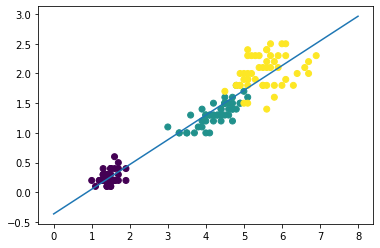

In [27]:
# x-werte
x_p = np.linspace(0, 8)[:, np.newaxis]
y_p = model.predict(x_p)

import matplotlib.pyplot as plt

plt.plot(x_p, y_p)
#plt.plot(X[:, 0], y, ".")
plt.scatter(X[:, 0], y, c=iris["target"])

## Validierung

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
# lernen anhand der Eingangsdaten:
model.fit(X, y)

# Vorhersage der y-Daten durch mein Modell:
y_pred = model.predict(X_test)
# Tatsächlichen y-Daten:
y_test

# Vergleich von y_pred und y_test
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

0.04498989571449102
0.9255734530791986


In [49]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

test_results = cross_validate(model, X, y, cv=5, scoring="r2")
test_scores = test_results["test_score"]
print(test_results)

{'fit_time': array([0.00168586, 0.00169063, 0.00140405, 0.00199962, 0.00218821]), 'score_time': array([0.00098205, 0.00098825, 0.00097036, 0.00154495, 0.0015161 ]), 'test_score': array([-0.11487018,  0.95263007,  0.38011675,  0.68756687, -0.45925651])}
